## Data Processing [of all the available csv files in the dataset]

In [1]:
# Importing initial libraries
import numpy as np # For inear algebra
import pandas as pd # For data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

### I. Analysis on First Data Set [Train Dataset.csv]

In [2]:
# Reading the csv file to a dataframe
train_data = pd.read_csv(r'C:\Users\ancya\Churn-Prediction-on-Music-Subscribers\Data Set\Train Dataset.csv')

# Extracting the head
train_data.head()

,Customer ID,Is_Churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1


In [3]:
# Shape of the dataframe
train_data.shape

(970960, 2)

In [4]:
# Checking for any null(nan) value in the dataframe
train_data.isnull().values.any()

False

#### The column 'is_churn' has boolean values [1 - Yes (churn), 0 - No (not churn)]

#### Checking the distribution of customer attribution using customer ID and churn labels [0 or 1]  

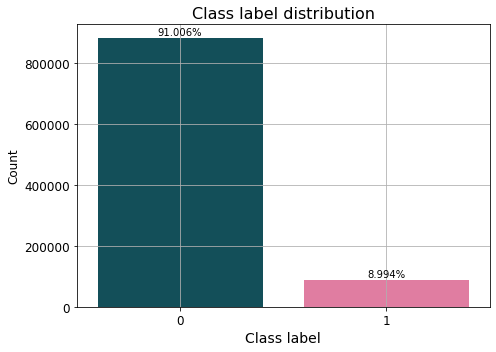

Number of data points in class 1 : 87330 ( 8.994 %)
Number of data points in class 0 : 883630 ( 91.006 %)


In [5]:
# Distribution of custmoer attribution using customer ID and churn labels

plt.figure(figsize=(7, 5))
ax = sns.countplot(x='Is_Churn', data=train_data, palette=["#075865", "#F16C9C"])
plt.xticks(size=12)
plt.xlabel('Class label', size=14)
plt.yticks(size=12)
plt.ylabel('Count', size=12)
plt.title('Class label distribution', size=16)

total = len(train_data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.3f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.grid()
plt.show()

class_distribution = train_data['Is_Churn'].value_counts().sort_index()
sorted_yi = np.argsort(class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i , ':',class_distribution.values[i], '(', np.round((class_distribution.values[i]/train_data.shape[0]*100), 3), '%)')

### II. Analysis on Second Data Set [Member Details.csv]

In [6]:
# Reading the csv file to a dataframe
members_data = pd.read_csv(r'C:\Users\ancya\Churn-Prediction-on-Music-Subscribers\Data Set\Member Details.csv')

# Extracting the head
members_data.head()

,Customer ID,City,Age,Gender,Registered_Via,Registered on
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


In [7]:
# Shape of the dataframe
members_data.shape

(1048575, 6)

In [8]:
# Merging train dataset with members dataset
train_members = pd.merge(train_data, members_data, on='Customer ID', how='left')

# Extracting the head
train_members.head()

,Customer ID,Is_Churn,City,Age,Gender,Registered_Via,Registered on
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,NaN,NaN,NaN,NaN,NaN
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,NaN,NaN,NaN,NaN,NaN
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,NaN,NaN,NaN,NaN,NaN
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,NaN,NaN,NaN,NaN,NaN
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,NaN,NaN,NaN,NaN,NaN


In [9]:
# Dropping the columns with NAN values
train_members = train_members.dropna()

# Exploring the new dataframe without any NAN values
train_members.head()

,Customer ID,Is_Churn,City,Age,Gender,Registered_Via,Registered on
18,1AzXWFlRO6EfMBzfBdk98sBVnjzY7U1G24mVFNdzGNQ=,1,14.0,29.0,male,3.0,20140510.0
21,nGmbdyGVU+LCI2SXyYosErJCCYp371hQNP91BpP2d2I=,1,13.0,38.0,male,3.0,20140608.0
22,SlkPQrh6oIqsdpW+Sl2adYlJNEwWSQsIYycM11dSUQg=,1,14.0,49.0,male,7.0,20140611.0
24,ePx+sYifOKWLbG1fC8Gy2rjlg92Z7+Blxj94zzyC2+g=,1,22.0,18.0,male,9.0,20140719.0
25,Z9Y6f2hXZpPIvbLgHHgUncs7Tb+qmKgGNSwwVAiMlm0=,1,12.0,21.0,female,9.0,20140719.0


### Demographic Distribution of Members Dataset [based on City, Age, Gender, Registration Mode and Registered on]

#### 1. Gender Distibution in the dataset

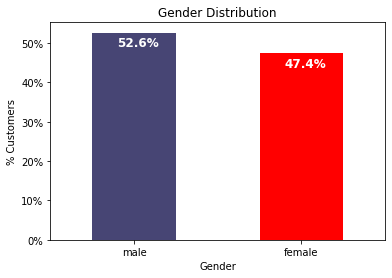

In [10]:
colors = ['#474574','#FF0000']
ax = (train_members['Gender'].value_counts()*100.0 /len(train_members)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')


#### Churn by Gender

In [11]:
# to plot count plot with percentage
def count_plot(data, col1, xname, yname, title, fig, col2='Is_Churn'):
    '''This function is used to plot a count plot, with percentage displayed on top of each bin'''
    
    # https://stackoverflow.com/questions/63603222/adding-percentages-to-sns-countplot-how-do-i-show-percentages-for-two-values-w
    plt.figure(figsize=fig)
    ax = sns.countplot(data=data, x=col1, hue=col2, hue_order=[0, 1], palette=["#DD1946", "#0D6E7F"])
    plt.xticks(size=12)
    plt.xlabel(xname, size=14)
    plt.yticks(size=12)
    plt.ylabel(yname, size=12)
    plt.title(title, size=16)
    
    total = len(data)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center', size=12)
    plt.tight_layout()
    plt.grid()
    plt.show()

In [12]:
# to get category wise percentage and total churn
def countplot_analysis(data, col1, xname, yname, title, fig, col2='Is_Churn', top=False):
    '''This function is used to display a table with the total and average churned users'''
    
    # https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # https://stackoverflow.com/a/19385591/4084039
    temp['total_users'] = pd.DataFrame(data.groupby(col1)[col2].agg(total_users='count')).reset_index()['total_users']
    temp['average_churned_users'] = pd.DataFrame(data.groupby(col1)[col2].agg(average_churned_users='mean')).reset_index()['average_churned_users']
    
    temp.sort_values(by=['total_users'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    count_plot(data, col1, xname, yname, title, fig, col2)
    print(temp)

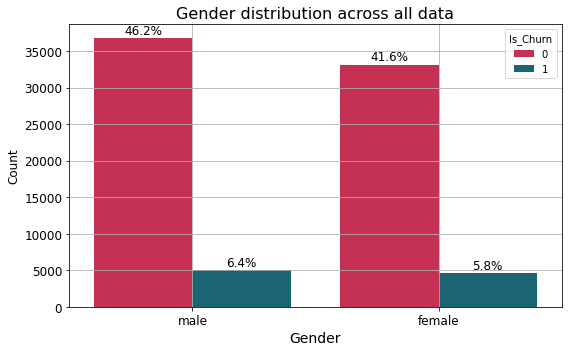

   Gender  Is_Churn  total_users  average_churned_users
1    male      5073        41875               0.121146
0  female      4606        37755               0.121997


In [13]:
countplot_analysis(train_members, 'Gender', 'Gender', 'Count', 'Gender distribution across all data', (8,5),'Is_Churn', False)

#### 2. Cities in the dataset

In [14]:
# Checking the number of cities in the dataset
print(len(train_members['City'].unique()))

21


#### Churn by Cities

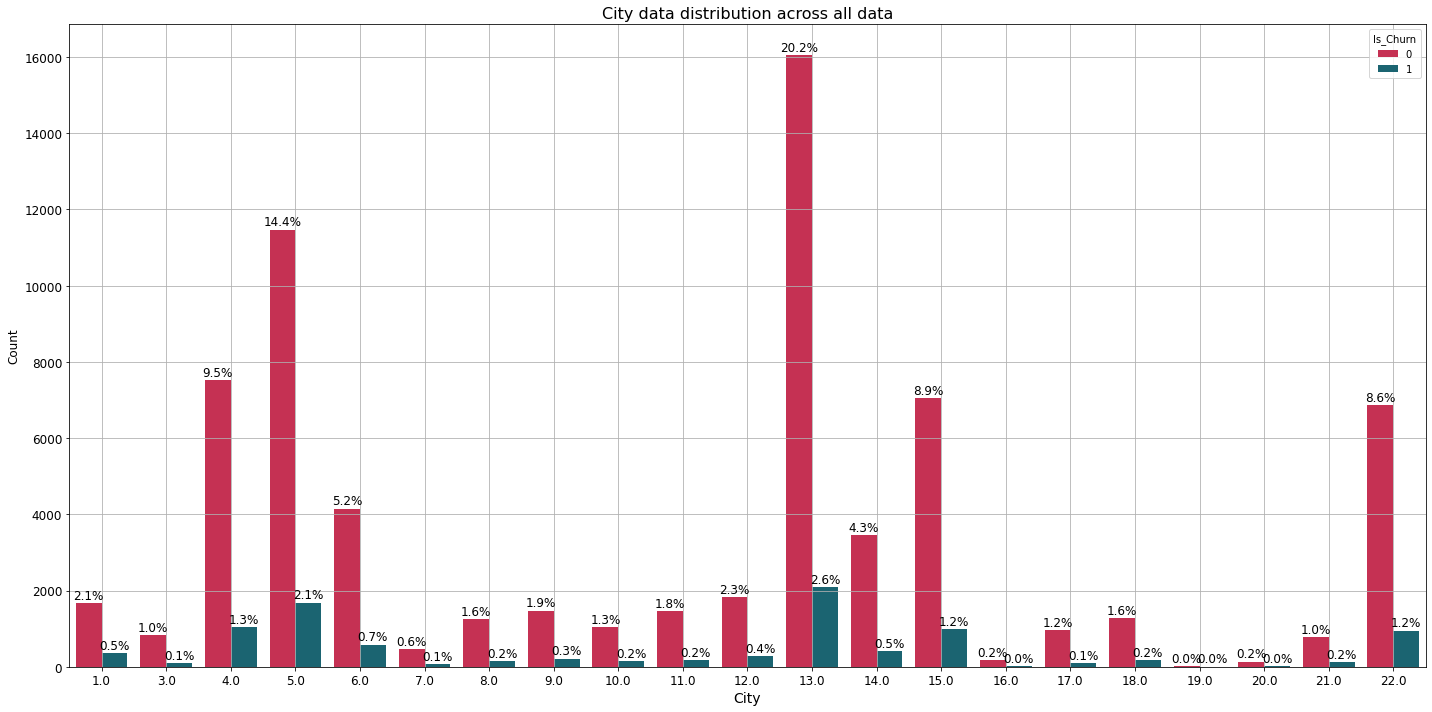

    City  Is_Churn  total_users  average_churned_users
11  13.0      2087        18141               0.115043
3    5.0      1684        13158               0.127983
2    4.0      1049         8578               0.122290
13  15.0       979         8030               0.121918
20  22.0       952         7823               0.121692
4    6.0       582         4734               0.122940
12  14.0       416         3868               0.107549
10  12.0       282         2109               0.133713
0    1.0       367         2037               0.180167
7    9.0       214         1688               0.126777
9   11.0       166         1637               0.101405
16  18.0       168         1440               0.116667
6    8.0       158         1402               0.112696
8   10.0       147         1187               0.123842
15  17.0        96         1067               0.089972
1    3.0       101          929               0.108719
19  21.0       131          910               0.143956
5    7.0  

In [15]:
countplot_analysis(train_members, 'City', 'City', 'Count', 'City data distribution across all data', (20, 10),'Is_Churn', False)

#### 3. Age Distibution in the dataset

In [16]:
# Just considering the age range between 0 and 72
train_members['Age'] = train_members['Age'].apply(lambda x: x if (x < 72.0) and (x > 0.0) else np.nan)

In [17]:
# Categorozing the age
bins = np.arange(1, 10) * 10
train_members['category'] = np.digitize(train_members['Age'], bins, right=True)

#### Churn by Age

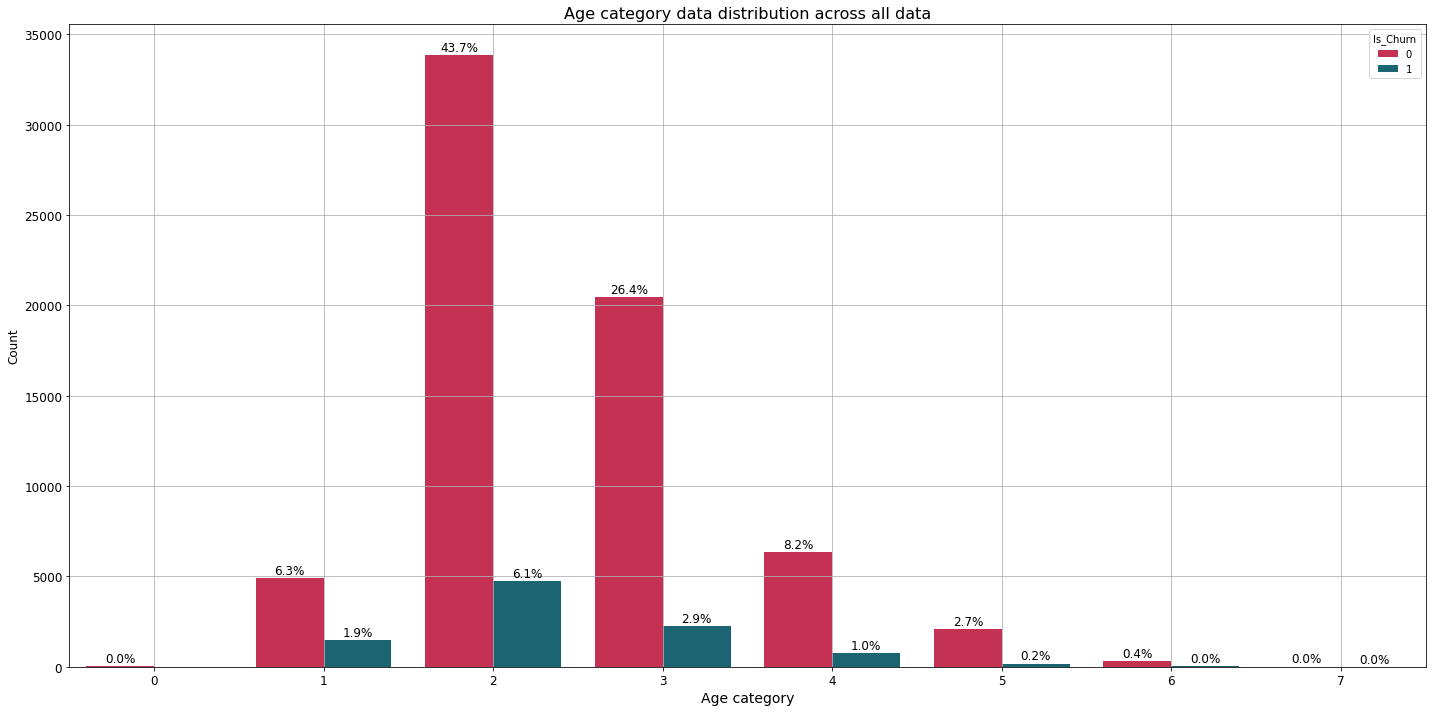

   category  Is_Churn  total_users  average_churned_users
2         2      4732        38590               0.122622
3         3      2239        22708               0.098600
4         4       741         7084               0.104602
1         1      1466         6377               0.229889
5         5       182         2263               0.080424
6         6        37          373               0.099196
0         0         0           26               0.000000
7         7         2           10               0.200000


In [18]:
# count plot
countplot_analysis(train_members[train_members['category'] != 9], 'category', 'Age category', 'Count', 'Age category data distribution across all data', (20, 10),'Is_Churn', False)

#### 4. Registration mode in the dataset

In [19]:
# Checking the number of unique registration ways
print(len(train_members['Registered_Via'].unique()))

5


#### Churn by Registration Mode

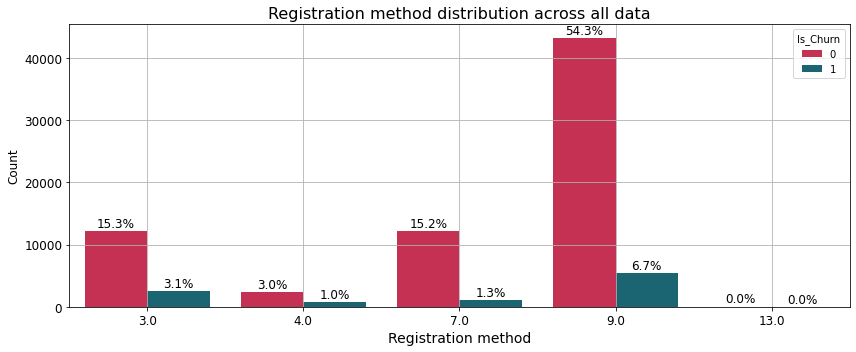

   Registered_Via  Is_Churn  total_users  average_churned_users
3             9.0      5355        48602               0.110181
0             3.0      2480        14631               0.169503
2             7.0      1046        13167               0.079441
1             4.0       794         3192               0.248747
4            13.0         4           38               0.105263


In [20]:
countplot_analysis(train_members, 'Registered_Via', 'Registration method', 'Count', 'Registration method distribution across all data', (12,5),'Is_Churn', False)

#### 5. Registered dates on dataset

In [21]:
# Converting float date to datetime
train_members['Registered on'] = pd.to_datetime(train_members['Registered on'], format='%Y%m%d')
# getting head of the feature
train_members['Registered on'].head()

18   2014-05-10
21   2014-06-08
22   2014-06-11
24   2014-07-19
25   2014-07-19
Name: Registered on, dtype: datetime64[ns]

In [22]:
train_members['year'] = train_members['Registered on'].dt.year.values
# adding month feature
train_members['month'] = train_members['Registered on'].dt.month.values
# adding weekday feature
# Reference: https://stackoverflow.com/questions/60214194/error-in-reading-stock-data-datetimeproperties-object-has-no-attribute-week
train_members['weekday'] = train_members['Registered on'].dt.day_name().values

#### Churn by Registration Date

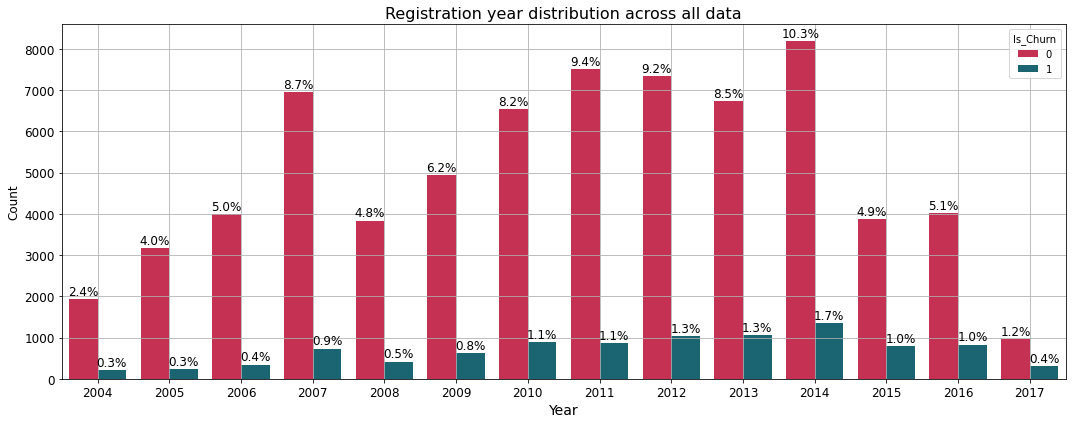

    year  Is_Churn  total_users  average_churned_users
10  2014      1354         9535               0.142003
7   2011       873         8380               0.104177
8   2012      1029         8364               0.123027
9   2013      1050         7783               0.134909
3   2007       731         7679               0.095195
6   2010       880         7414               0.118694
5   2009       623         5559               0.112071
12  2016       831         4854               0.171199
11  2015       791         4656               0.169888
2   2006       345         4330               0.079677
4   2008       417         4253               0.098048
1   2005       235         3411               0.068895
0   2004       203         2126               0.095484
13  2017       317         1286               0.246501


In [23]:
# count plot
countplot_analysis(train_members, 'year', 'Year', 'Count', 'Registration year distribution across all data', (15,6),'Is_Churn', False)

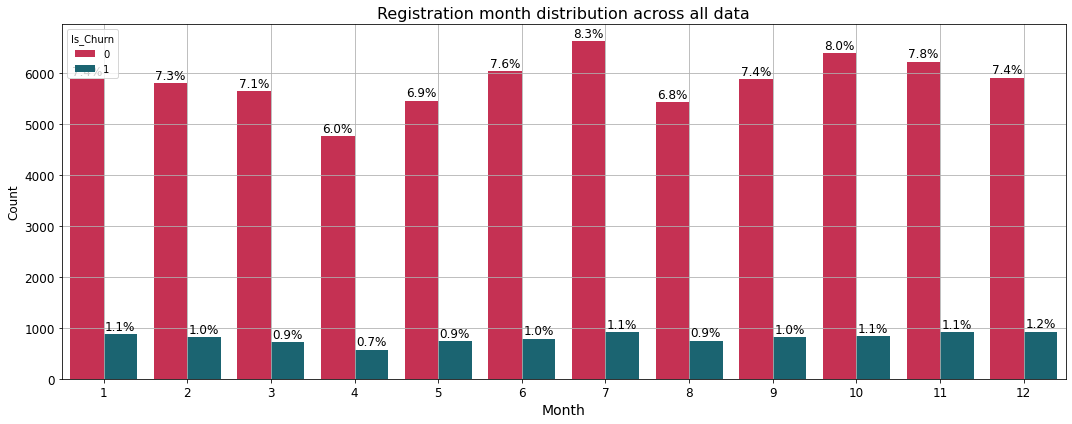

    month  Is_Churn  total_users  average_churned_users
6       7       913         7529               0.121264
9      10       840         7225               0.116263
10     11       912         7128               0.127946
11     12       927         6831               0.135705
5       6       789         6823               0.115638
0       1       880         6752               0.130332
8       9       816         6686               0.122046
1       2       817         6606               0.123675
2       3       718         6350               0.113071
4       5       746         6201               0.120303
7       8       748         6173               0.121173
3       4       573         5326               0.107585


In [24]:
# count plot
countplot_analysis(train_members, 'month', 'Month', 'Count', 'Registration month distribution across all data', (15,6),'Is_Churn', False)

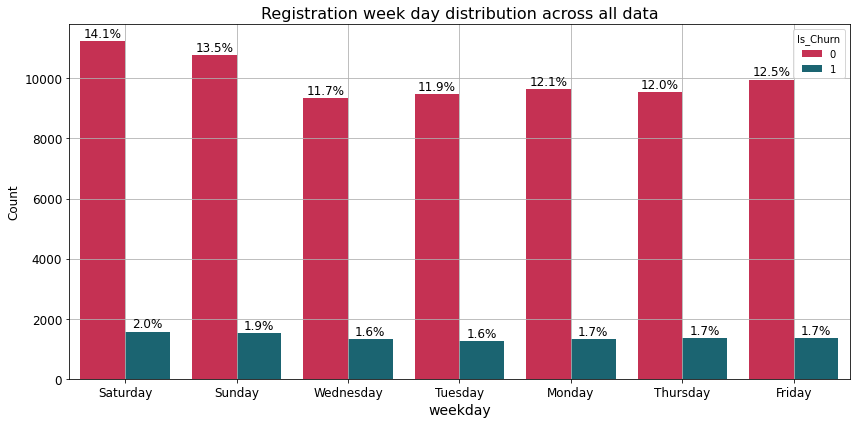

     weekday  Is_Churn  total_users  average_churned_users
2   Saturday      1573        12806               0.122833
3     Sunday      1518        12302               0.123395
0     Friday      1363        11318               0.120428
1     Monday      1324        10974               0.120649
4   Thursday      1343        10877               0.123472
5    Tuesday      1247        10709               0.116444
6  Wednesday      1311        10644               0.123168


In [25]:
# count plot
countplot_analysis(train_members, 'weekday', 'weekday', 'Count', 'Registration week day distribution across all data', (12,6),'Is_Churn', False)

### III. Analysis on Third Data Set [Transactions.csv]

In [26]:
# Reading the csv file to a dataframe
transactions_data = pd.read_csv(r'C:\Users\ancya\Churn-Prediction-on-Music-Subscribers\Data Set\Transactions.csv')

# Extracting the head
transactions_data.head()

,Customer ID,Payment_Method_ID,Payment_Plan_Days,Plan_List_Price,Actual_Amount_Paid,Auto_Renewed,Transaction_Date,Membership_Expire_Date,Cancelled
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,20170131,20170504,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,20150809,20190412,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,20170303,20170422,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,20170329,20170331,1
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,20170323,20170423,0


In [27]:
# Merging train dataset with transactions dataset
train_transactions = pd.merge(train_data, transactions_data, on='Customer ID', how='left')

# Extracting the head
train_transactions.head()

,Customer ID,Is_Churn,Payment_Method_ID,Payment_Plan_Days,Plan_List_Price,Actual_Amount_Paid,Auto_Renewed,Transaction_Date,Membership_Expire_Date,Cancelled
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,36.0,30.0,180.0,180.0,0.0,20170311.0,20170411.0,0.0
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,17.0,60.0,0.0,0.0,0.0,20170311.0,20170314.0,0.0
3,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,15.0,90.0,300.0,300.0,0.0,20170314.0,20170615.0,0.0
4,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,41.0,30.0,149.0,149.0,1.0,20150908.0,20170608.0,0.0


In [28]:
# Dropping the columns with NAN values
train_transactions = train_transactions.dropna()

# Extracting the head
train_transactions.head()

,Customer ID,Is_Churn,Payment_Method_ID,Payment_Plan_Days,Plan_List_Price,Actual_Amount_Paid,Auto_Renewed,Transaction_Date,Membership_Expire_Date,Cancelled
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,36.0,30.0,180.0,180.0,0.0,20170311.0,20170411.0,0.0
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,17.0,60.0,0.0,0.0,0.0,20170311.0,20170314.0,0.0
3,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,15.0,90.0,300.0,300.0,0.0,20170314.0,20170615.0,0.0
4,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,41.0,30.0,149.0,149.0,1.0,20150908.0,20170608.0,0.0
5,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,41.0,30.0,149.0,149.0,1.0,20150908.0,20170708.0,0.0


#### 1. Churn by Payment_Method_ID

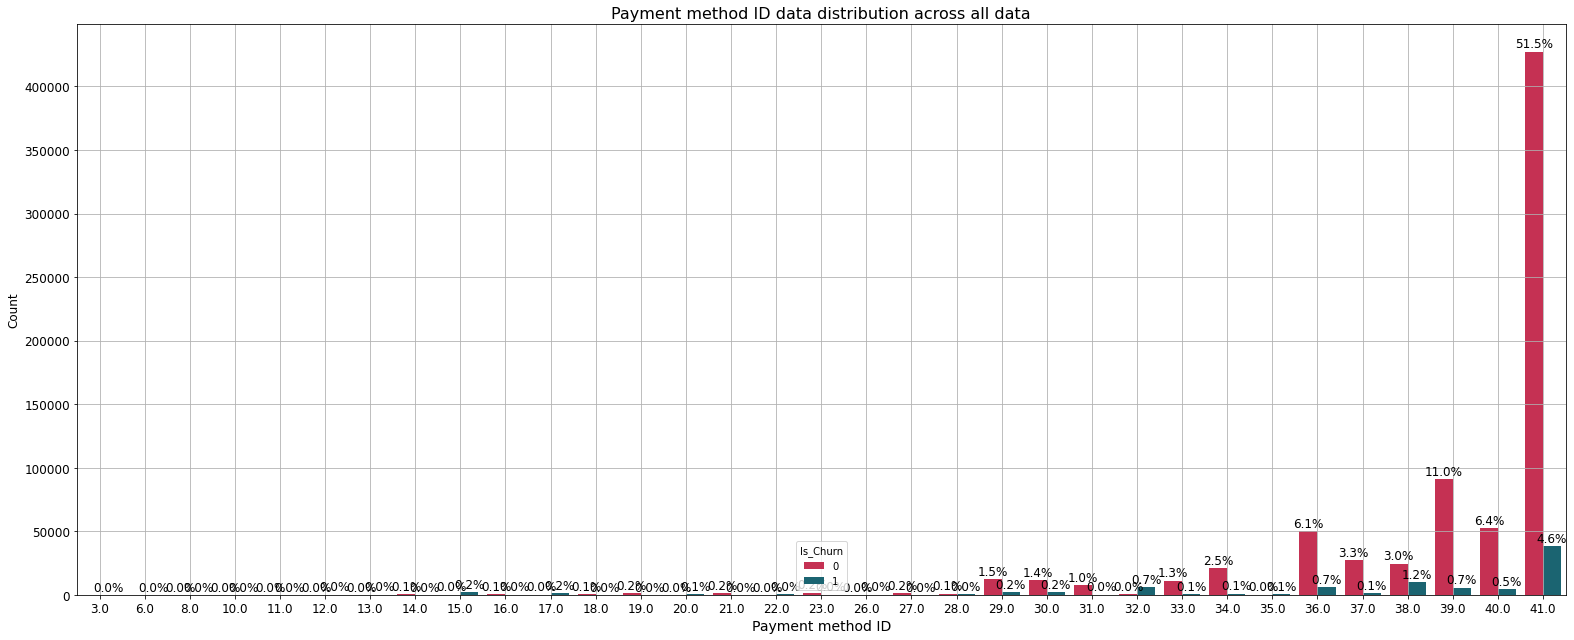

    Payment_Method_ID  Is_Churn  total_users  average_churned_users
32               41.0     38344       465811               0.082317
30               39.0      5618        96567               0.058177
31               40.0      4387        57128               0.076792
27               36.0      5864        56148               0.104438
29               38.0     10079        34651               0.290872
28               37.0      1028        28057               0.036640
25               34.0       873        21989               0.039702
20               29.0      1939        14348               0.135141
21               30.0      1853        13342               0.138885
24               33.0       590        11713               0.050371
22               31.0       222         8150               0.027239
23               32.0      6089         6330               0.961927
8                15.0      1986         2199               0.903138
16               23.0       109         1904    

In [29]:
# count plot
countplot_analysis(train_transactions, 'Payment_Method_ID', 'Payment method ID', 'Count', 'Payment method ID data distribution across all data', (22, 9),'Is_Churn', False)

#### 2. Churn by Payment_Plan_Days

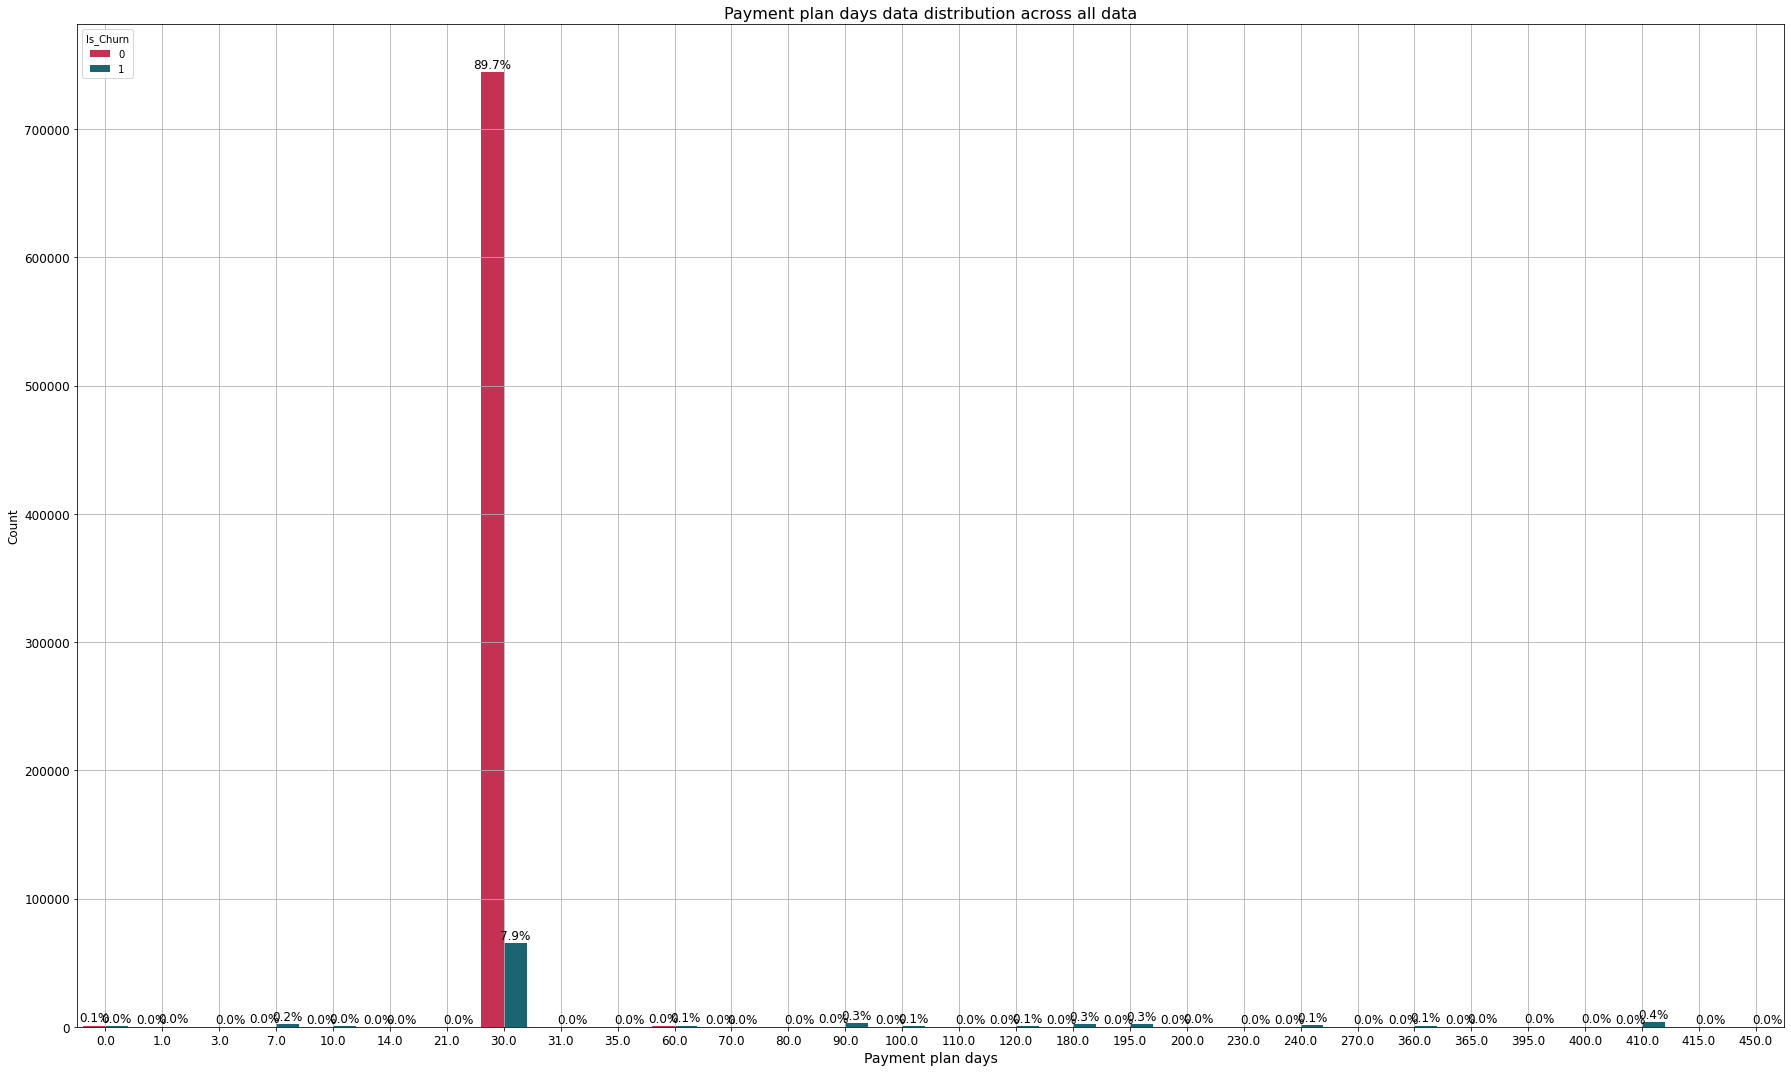

    Payment_Plan_Days  Is_Churn  total_users  average_churned_users
7                30.0     65353       809772               0.080705
27              410.0      3355         3396               0.987927
13               90.0      2684         2880               0.931944
17              180.0      2201         2220               0.991441
18              195.0      2202         2220               0.991892
3                 7.0      1943         2105               0.923040
0                 0.0       378         1363               0.277329
10               60.0       928         1319               0.703563
21              240.0      1053         1077               0.977716
23              360.0       908          923               0.983749
16              120.0       584          598               0.976589
14              100.0       475          478               0.993724
4                10.0       255          263               0.969582
25              395.0       222          222    

In [30]:
countplot_analysis(train_transactions, 'Payment_Plan_Days', 'Payment plan days', 'Count', 'Payment plan days data distribution across all data', (25, 15),'Is_Churn', False)

#### 3. Churn by Plan_List_Price

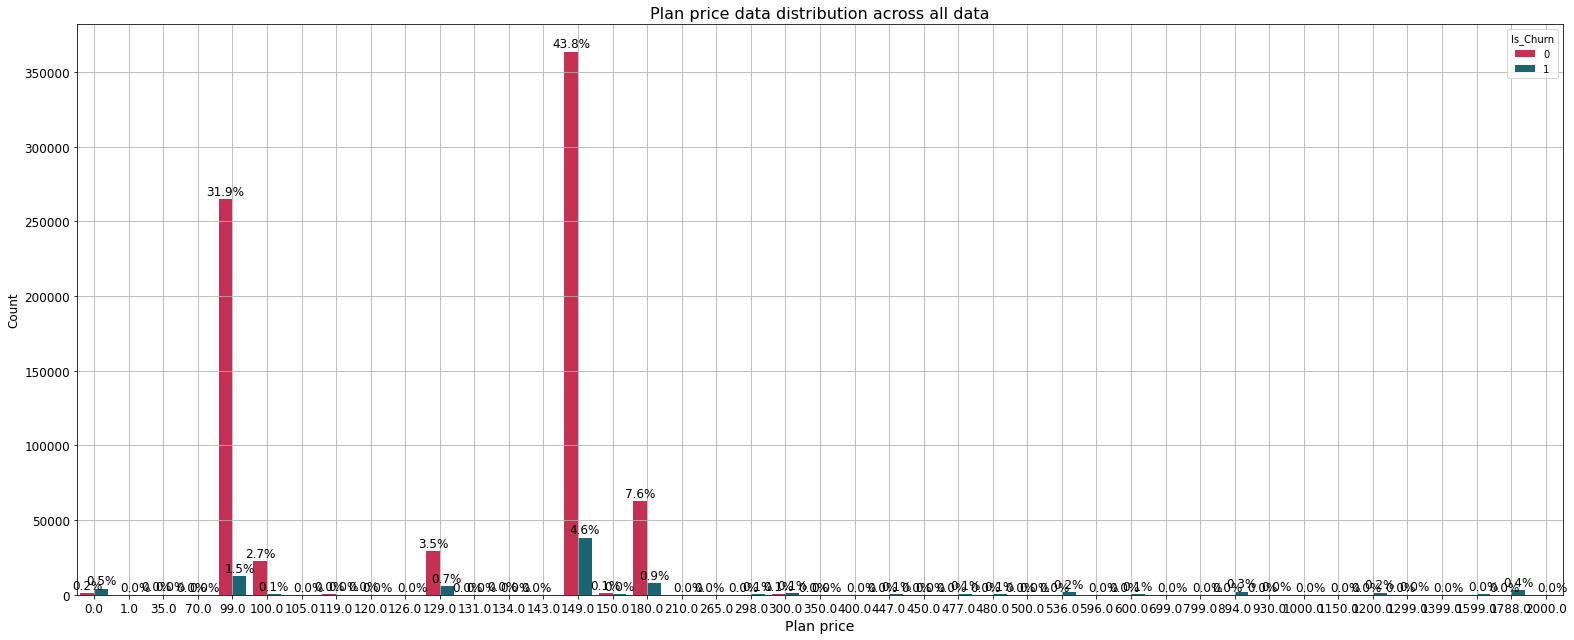

    Plan_List_Price  Is_Churn  total_users  average_churned_users
14            149.0     38249       401955               0.095157
4              99.0     12285       277229               0.044314
16            180.0      7699        70392               0.109373
10            129.0      5834        34896               0.167182
5             100.0       728        23321               0.031217
0               0.0      4215         5529               0.762344
41           1788.0      3394         3433               0.988640
33            894.0      2203         2220               0.992342
28            536.0      1744         1761               0.990346
20            300.0      1033         1462               0.706566
37           1200.0      1432         1453               0.985547
15            150.0       233         1166               0.199828
25            477.0       830          839               0.989273
30            600.0       584          587               0.994889
19        

In [31]:
# count plot
countplot_analysis(train_transactions, 'Plan_List_Price', 'Plan price', 'Count', 'Plan price data distribution across all data', (22, 9),'Is_Churn', False)

#### 4. Churn by Actual Amount Paid

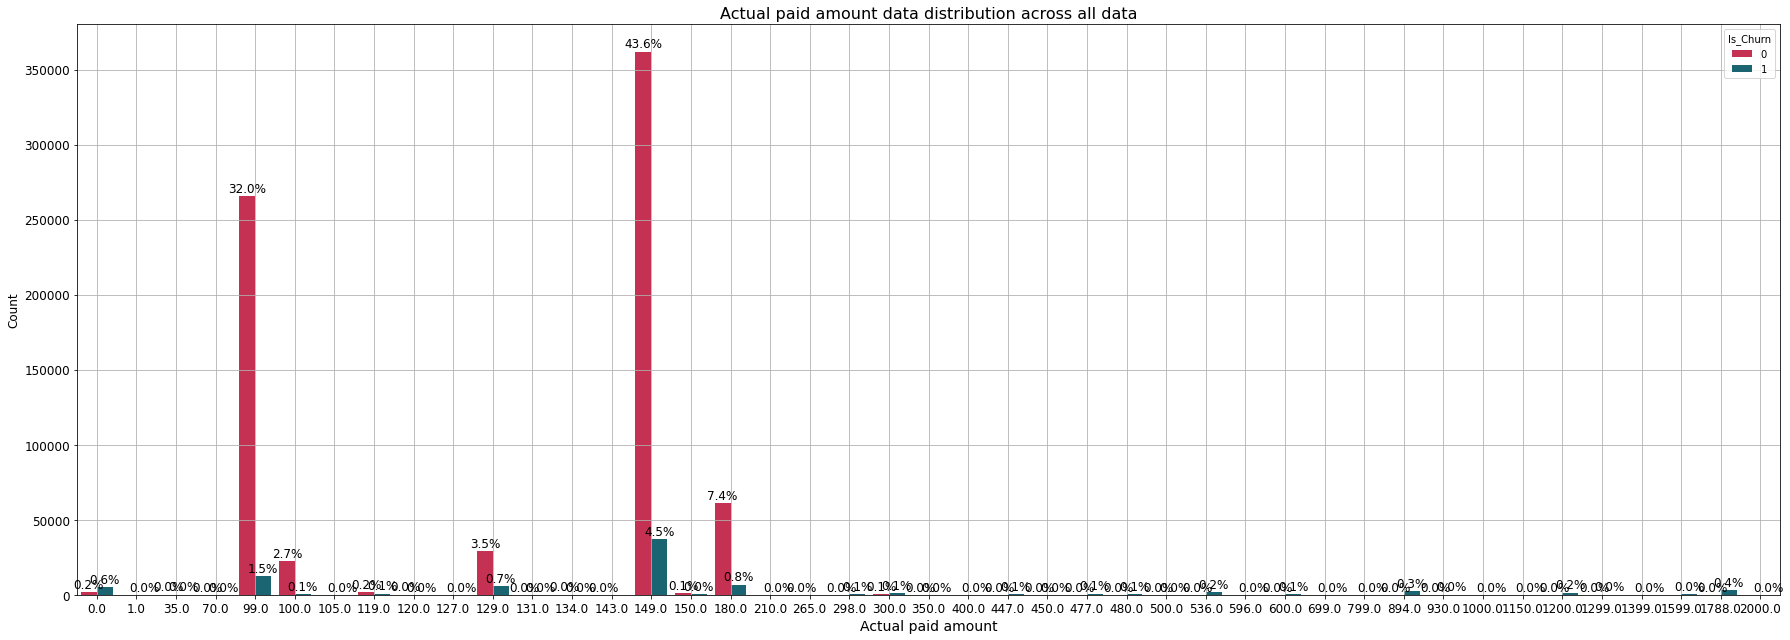

    Actual_Amount_Paid  Is_Churn  total_users  average_churned_users
14               149.0     37367       399333               0.093574
4                 99.0     12308       277778               0.044309
16               180.0      6837        68078               0.100429
10               129.0      5868        35184               0.166780
5                100.0       729        23333               0.031243
0                  0.0      5248         7213               0.727575
41              1788.0      3394         3433               0.988640
7                119.0       756         2795               0.270483
33               894.0      2203         2220               0.992342
28               536.0      1744         1761               0.990346
20               300.0      1033         1462               0.706566
37              1200.0      1432         1453               0.985547
15               150.0       233         1165               0.200000
25               477.0       830  

In [32]:
countplot_analysis(train_transactions, 'Actual_Amount_Paid', 'Actual paid amount', 'Count', 'Actual paid amount data distribution across all data', (25, 9),'Is_Churn', False)

#### 5. Churn by Auto-Renew

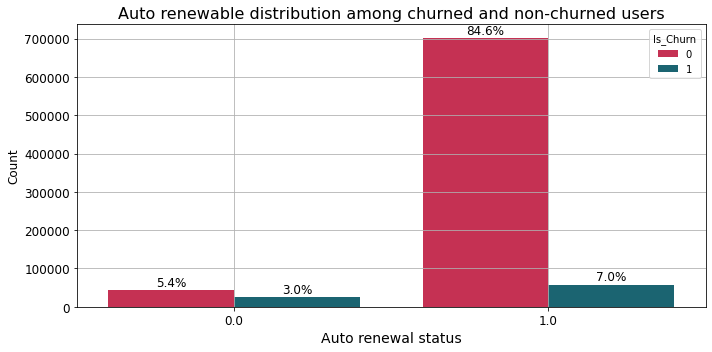

   Auto_Renewed  Is_Churn  total_users  average_churned_users
1           1.0     58180       760129               0.076540
0           0.0     25013        69431               0.360257


In [33]:
countplot_analysis(train_transactions, 'Auto_Renewed', 'Auto renewal status', 'Count', 'Auto renewable distribution among churned and non-churned users', (10,5), col2='Is_Churn', top=False)


#### 6. Churn by Transaction_Date

In [34]:
# Converting float date to datetime
train_transactions['Transaction_Date'] = pd.to_datetime(train_transactions['Transaction_Date'], format='%Y%m%d')

# Extracting head of the feature
train_transactions['Transaction_Date'].head()

1   2017-03-11
2   2017-03-11
3   2017-03-14
4   2015-09-08
5   2015-09-08
Name: Transaction_Date, dtype: datetime64[ns]

In [35]:
# Adding year to df
train_transactions['year'] = train_transactions['Transaction_Date'].dt.year.values

# Adding month to df
train_transactions['month'] = train_transactions['Transaction_Date'].dt.month.values

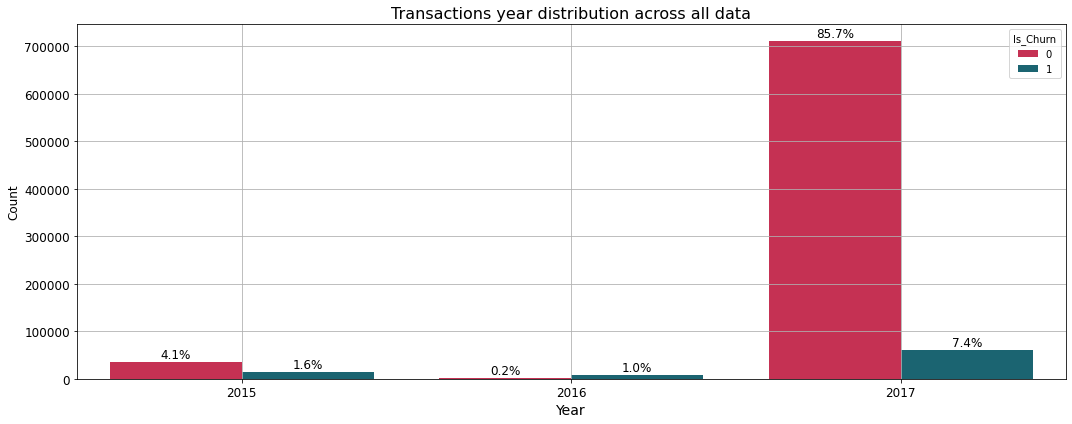

   year  Is_Churn  total_users  average_churned_users
2  2017     61121       771754               0.079198
0  2015     13682        48065               0.284656
1  2016      8390         9741               0.861308


In [36]:
# Count Plot by Year
countplot_analysis(train_transactions, 'year', 'Year', 'Count', 'Transactions year distribution across all data', (15,6),'Is_Churn', False)

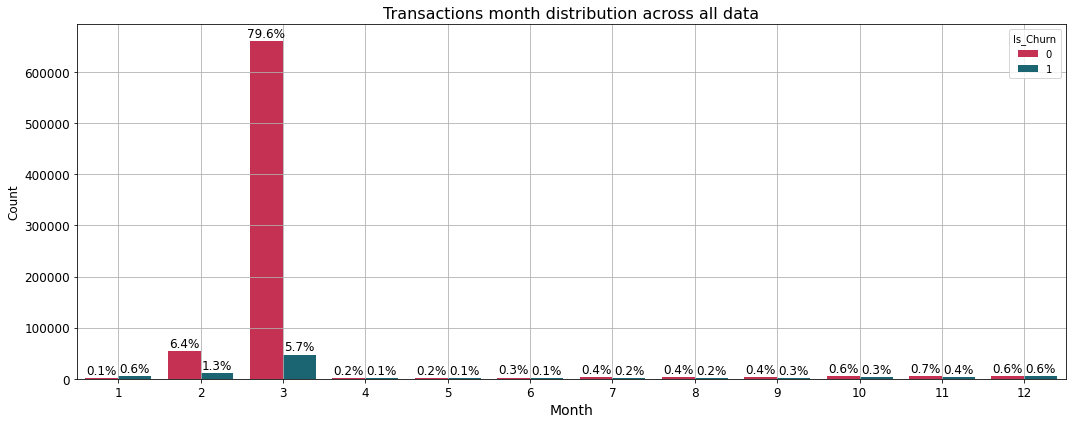

    month  Is_Churn  total_users  average_churned_users
2       3     47464       707383               0.067098
1       2     10881        64287               0.169257
11     12      4607         9739               0.473047
10     11      3293         9010               0.365483
9      10      2694         7359               0.366082
0       1      5230         6460               0.809598
8       9      2118         5843               0.362485
7       8      1940         5402               0.359126
6       7      1973         4977               0.396424
5       6      1218         3667               0.332152
4       5       993         3013               0.329572
3       4       782         2420               0.323140


In [37]:
# Count plot by Month
countplot_analysis(train_transactions, 'month', 'Month', 'Count', 'Transactions month distribution across all data', (15,6),'Is_Churn', False)

#### 7. Churn by Membership_Expire_Date

In [38]:
# Converting float date to datetime
train_transactions['Membership_Expire_Date'] = pd.to_datetime(train_transactions['Membership_Expire_Date'], format='%Y%m%d')

# Extracting head of the feature
train_transactions['Membership_Expire_Date'].head()

1   2017-04-11
2   2017-03-14
3   2017-06-15
4   2017-06-08
5   2017-07-08
Name: Membership_Expire_Date, dtype: datetime64[ns]

In [39]:
# Adding year to df
train_transactions['ex_year'] = train_transactions['Membership_Expire_Date'].dt.year.values

# Adding month to df
train_transactions['ex_month'] = train_transactions['Membership_Expire_Date'].dt.month.values

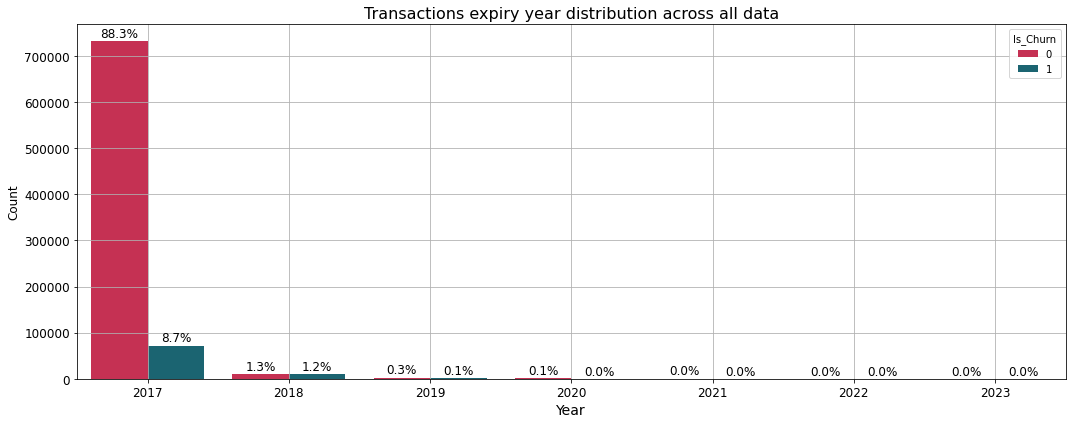

   ex_year  Is_Churn  total_users  average_churned_users
0     2017     72126       804247               0.089681
1     2018      9905        20345               0.486852
2     2019       917         3601               0.254651
3     2020       184         1011               0.181998
4     2021        42          276               0.152174
5     2022        18           66               0.272727
6     2023         1           14               0.071429


In [40]:
# count plot by Year
countplot_analysis(train_transactions, 'ex_year', 'Year', 'Count', 'Transactions expiry year distribution across all data', (15,6),'Is_Churn', False)

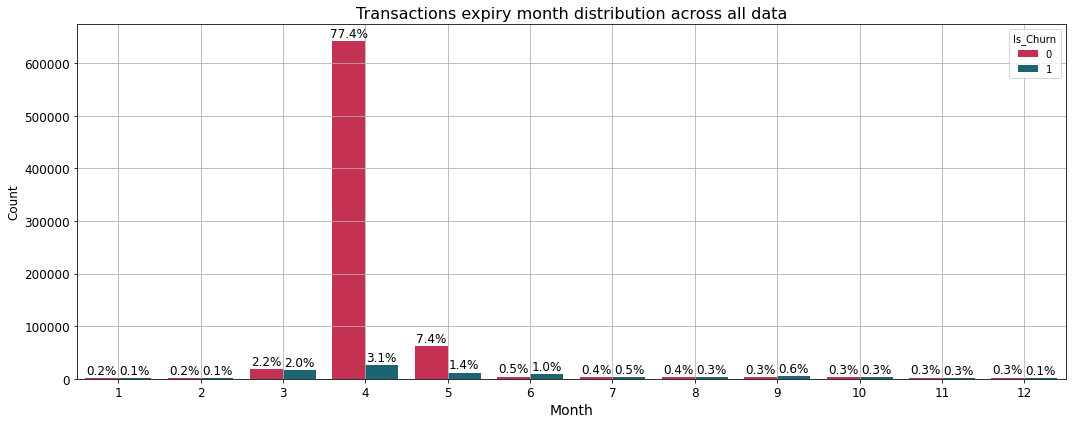

    ex_month  Is_Churn  total_users  average_churned_users
3          4     25955       667710               0.038872
4          5     11652        73313               0.158935
2          3     16952        34878               0.486037
5          6      8568        12803               0.669218
8          9      5279         8173               0.645907
6          7      3947         7673               0.514401
7          8      2693         6006               0.448385
9         10      2887         5599               0.515628
10        11      2080         4477               0.464597
11        12      1213         3349               0.362198
0          1      1085         3072               0.353190
1          2       882         2507               0.351815


In [41]:
# Count plot by Month
countplot_analysis(train_transactions, 'ex_month', 'Month', 'Count', 'Transactions expiry month distribution across all data', (15,6),'Is_Churn', False)

#### 8. Churn by Cancelled Subscription

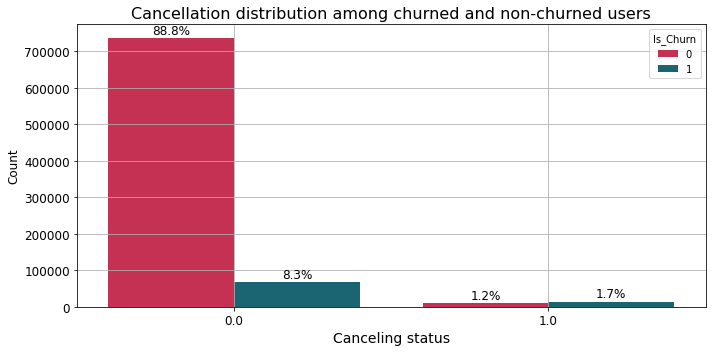

   Cancelled  Is_Churn  total_users  average_churned_users
0        0.0     68699       805310               0.085308
1        1.0     14494        24250               0.597691


In [42]:
# Count plot by Cancelled Subscription
countplot_analysis(train_transactions, 'Cancelled', 'Canceling status', 'Count', 'Cancellation distribution among churned and non-churned users', (10,5), col2='Is_Churn', top=False)

### IV. Analysis on Fourth Dataset [User Logs.csv]

In [43]:
# Reading the csv file to a dataframe
logs_data = pd.read_csv(r'C:\Users\ancya\Churn-Prediction-on-Music-Subscribers\Data Set\User Logs.csv')

# Extracting the head
logs_data.head()

,Customer ID,Date,0-25%,25-50%,50-75%,75-98.5%,Above 98.5%,Unique_Songs,Total_Secs
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,20170331,8,4,0,1,21,18,6309.273
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,20170330,2,2,1,0,9,11,2390.699
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,20170331,52,3,5,3,84,110,23203.337
3,ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=,20170331,176,4,2,2,19,191,7100.454
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,20170331,2,1,0,1,112,93,28401.558


In [44]:
# Merging train dataset with transactions dataset
train_logs = pd.merge(train_data, logs_data, on='Customer ID', how='left')

# Extracting the head
train_logs.head()

,Customer ID,Is_Churn,Date,0-25%,25-50%,50-75%,75-98.5%,Above 98.5%,Unique_Songs,Total_Secs
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,20170304.0,1.0,0.0,1.0,0.0,36.0,36.0,8746.115


In [45]:
# Dropping the columns with NAN values
train_logs = train_logs.dropna()

# Extracting the head
train_logs.head()

,Customer ID,Is_Churn,Date,0-25%,25-50%,50-75%,75-98.5%,Above 98.5%,Unique_Songs,Total_Secs
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,20170304.0,1.0,0.0,1.0,0.0,36.0,36.0,8746.115
5,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,20170321.0,2.0,1.0,1.0,0.0,76.0,61.0,19467.224
8,moRTKhKIDvb+C8ZHOgmaF4dXMLk0jOn65d7a8tQ2Eds=,1,20170308.0,0.0,1.0,0.0,0.0,30.0,26.0,10795.669
9,moRTKhKIDvb+C8ZHOgmaF4dXMLk0jOn65d7a8tQ2Eds=,1,20170319.0,4.0,0.0,0.0,1.0,46.0,14.0,11812.320
10,dW/tPZMDh2Oz/ksduEctJbsz0MXw3kay/1AlZCq3EbI=,1,20170317.0,33.0,17.0,10.0,6.0,79.0,95.0,23121.013


#### 1. Churn by Date of Logging in

In [46]:
# Converting float date to datetime
train_logs['Date'] = pd.to_datetime(train_logs['Date'], format='%Y%m%d')

# Getting head of the feature
train_logs['Date'].head()

4    2017-03-04
5    2017-03-21
8    2017-03-08
9    2017-03-19
10   2017-03-17
Name: Date, dtype: datetime64[ns]

In [47]:
# Adding day to df
train_logs['day'] = train_logs['Date'].dt.day.values

# Adding weekday to df
train_logs['weekday'] = train_logs['Date'].dt.day_name().values

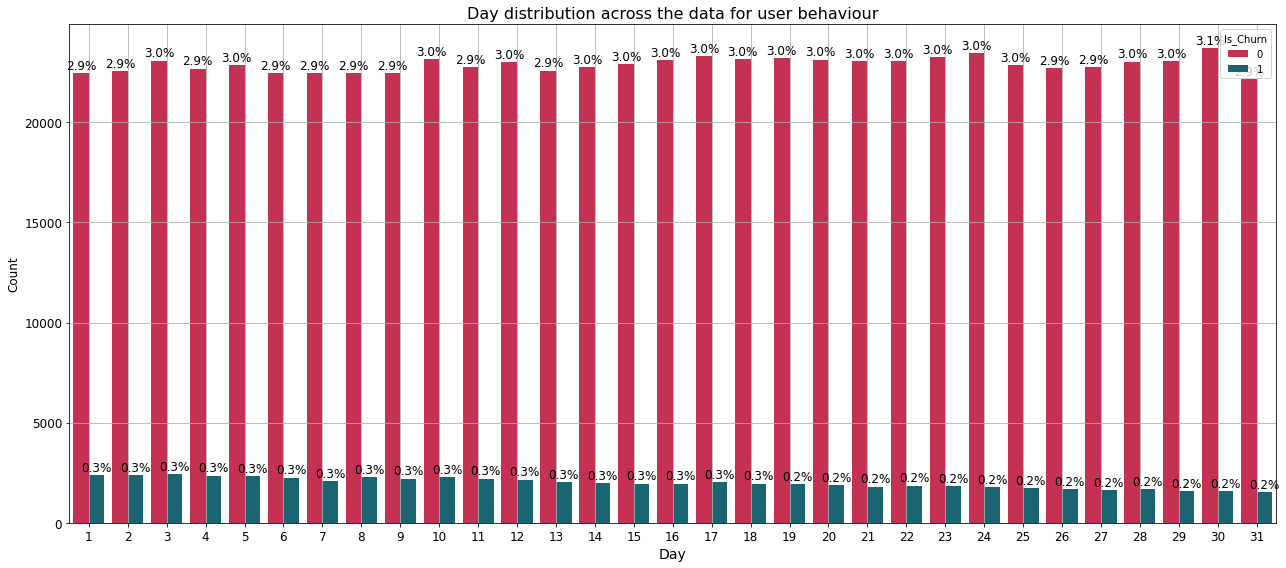

    day  Is_Churn  total_users  average_churned_users
2     3      2427        25507               0.095150
9    10      2265        25427               0.089079
16   17      2020        25334               0.079735
29   30      1569        25270               0.062089
23   24      1779        25240               0.070483
11   12      2153        25165               0.085555
4     5      2314        25153               0.091997
18   19      1927        25139               0.076654
22   23      1847        25120               0.073527
17   18      1961        25099               0.078131
15   16      1962        25056               0.078305
3     4      2357        25032               0.094159
19   20      1876        25005               0.075025
1     2      2384        24947               0.095563
10   11      2203        24940               0.088332
21   22      1861        24917               0.074688
20   21      1805        24864               0.072595
14   15      1958        248

In [48]:
# Count plot by Day
countplot_analysis(train_logs, 'day', 'Day', 'Count', 'Day distribution across the data for user behaviour', (18,8),'Is_Churn', False)

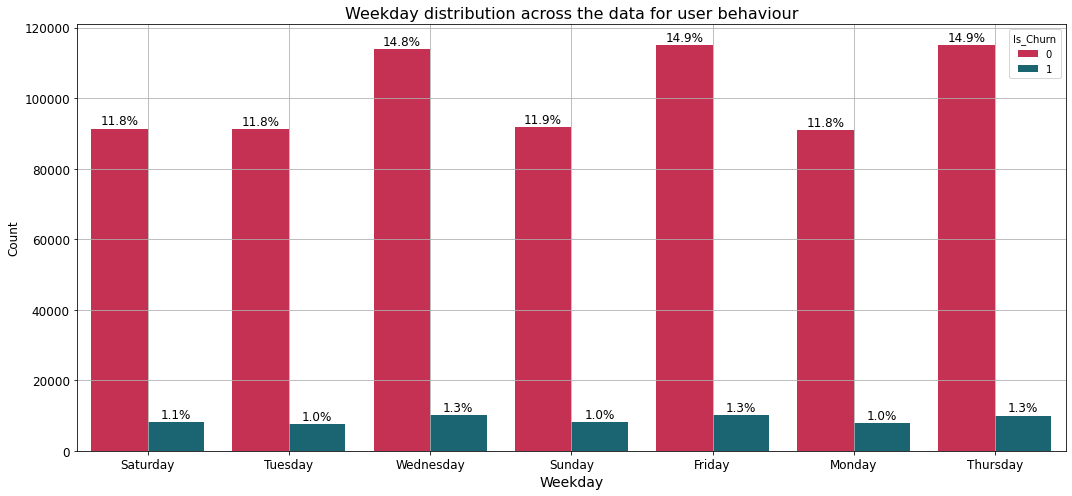

     weekday  Is_Churn  total_users  average_churned_users
0     Friday     10041       125213               0.080191
4   Thursday      9971       125064               0.079727
6  Wednesday     10065       123968               0.081190
3     Sunday      8062        99823               0.080763
2   Saturday      8239        99634               0.082693
5    Tuesday      7571        98876               0.076571
1     Monday      7826        98751               0.079250


In [49]:
# Count plot by Weekdays
countplot_analysis(train_logs, 'weekday', 'Weekday', 'Count', 'Weekday distribution across the data for user behaviour', (15,7),'Is_Churn', False)

#### 2. Churn by 0-25% [songs played less than 25% of the song length]

In [50]:
# For generating boxplot
def boxplot(data, col2, xname, yname, title, col1='Is_Churn'):
    
    sns.set_theme(style="whitegrid")
    ax = sns.boxplot(x=col1, y=col2, data=data)    
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.title(title)
    plt.show()

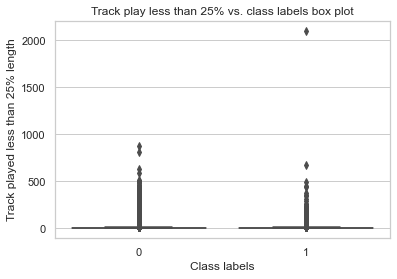

In [51]:
# Boxplot for songs played less than 25% of the song length
boxplot(train_logs, '0-25%', 'Class labels', 'Track played less than 25% length', 'Track play less than 25% vs. class labels box plot', col1='Is_Churn')

#### 3. Churn by 25-50% [songs played more than 25% and less than 50% of the song length]

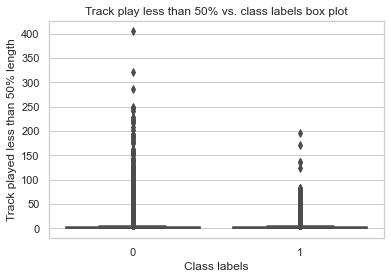

In [52]:
# Boxplot for songs played more than 25% and less than 50% of the song length
boxplot(train_logs, '25-50%', 'Class labels', 'Track played less than 50% length', 'Track play less than 50% vs. class labels box plot', col1='Is_Churn')

#### 4. Churn by 50-75% [songs played more than 50% and less than 75% of the song length]

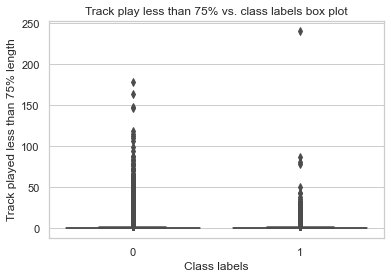

In [53]:
# Boxplot for songs played more than 50% and less than 75% of the song length
boxplot(train_logs, '50-75%', 'Class labels', 'Track played less than 75% length', 'Track play less than 75% vs. class labels box plot', col1='Is_Churn')

#### 5. Churn by 75-98.5% [songs played more than 75% and less than 98.5% of the song length]

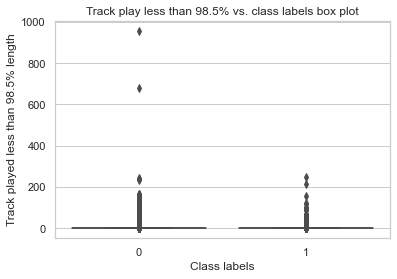

In [54]:
# Boxplot for songs played more than 75% and less than 98.5% of the song length
boxplot(train_logs, '75-98.5%', 'Class labels', 'Track played less than 98.5% length', 'Track play less than 98.5% vs. class labels box plot', col1='Is_Churn')

#### 6. Churn by songs above 98.5% [songs played more than 98.5% of the song length]

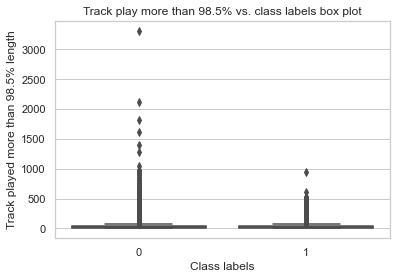

In [55]:
# Boxplot for songs played more than 75% and less than 98.5% of the song length
boxplot(train_logs, 'Above 98.5%', 'Class labels', 'Track played more than 98.5% length', 'Track play more than 98.5% vs. class labels box plot', col1='Is_Churn')

#### 7. Churn by Unique_Songs [unique songs played]

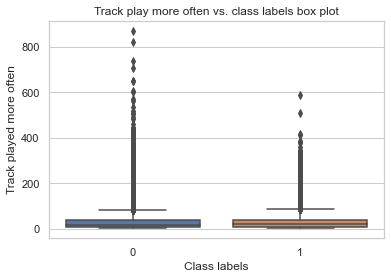

In [56]:
# Boxplot for songs played more often
boxplot(train_logs, 'Unique_Songs', 'Class labels', 'Track played more often', 'Track play more often vs. class labels box plot', col1='Is_Churn')

#### 8. Churn by total seconds played

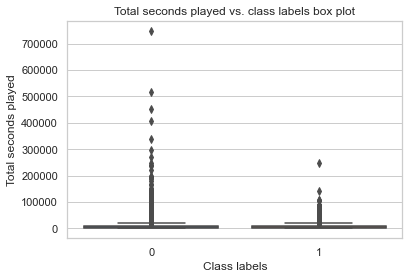

In [57]:
# Boxplot for songs played more often
boxplot(train_logs, 'Total_Secs', 'Class labels', 'Total seconds played', 'Total seconds played vs. class labels box plot', col1='Is_Churn')